# Proposal of Testing income and hours per week

Group: 19

Name: Jason Shi, Siying Liu, Shaoxi Guan, Guozheng Gong

## Introduction 

People often devote most of their time to their jobs, but the question then arises, Is there any relationship between people's income and the number of hours they work? As previous research indicated that “The pattern of decreasing hours with aggregate income holds for both men and women, for adults of all ages and education levels, and along both the extensive and intensive margin.” (Alexander Bick et., 2018). And the relationship between income inequality and work hours is widely concerned. The findings of research has shown that “greater income inequality is associated with longer work hours' ' (Alexiou, C, Kartiyasa, A, 2020). As a result, we raise our question: are people with lower income having less work hours per week than the people with higher income? We use the hours-per-week in the dataset as our random variable of interest and use two categories of year income (less than 50 thousand one year and greater or equal than 50 thousand one year) which can be treated as the low-income group and high-income group. The mean of hours-per-week is the location parameter we are going to focus and discuss. Due to the fact that mean is a relatively representative parameter that we can use to evaluate the dataset. After we divide the whole data into two different groups: low-income group and high-income group. The standard deviation is the scale parameter we are going to use to evaluate the random variables since it can reflect the spread of data points and it can be used to compare the variability of two or more data sets.

## Preliminary Data Analysis

In [1]:
# Here we load the packages necessary to run our functions
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In the code below, we can prove that the dataset can be read from the web. We will be naming the dataset "work_data".
Because the data on the website is a .zip, we will have to create a temporary object to store the .zip file, then download and read the file.

In [19]:
#Creating an object to store the .zip file temporary
temp <- tempfile()

#Downloading the file from the web letting temp hold the downloaded file
download.file("https://archive.ics.uci.edu/static/public/2/adult.zip", temp)

#Unzipping and reading the file, "adult.data" is our file of interest
work_data <- read_csv(unz(temp, "adult.data"), col_names = FALSE)

#Removing the temporary file as it is no longer needed
unlink(temp)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(work_data)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Our data currently does not have column names, thus we will need to add column names based on what each column represents.

In [23]:
#Creating the appropriate names based on website's information about the data
names <- c("age","workclass","Identification","education",
           "education-num","marital-status","occupation","relationship",
           "race","sex","capital-gain",
           "capital-loss","hours_per_week","native-country",
          "income")

#Giving each column the appropriate name
colnames(work_data) <- names

#Let's take a look
head(work_data)

age,workclass,Identification,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Now that our data is tidy, let's only select the columns we are interested in. We will rename this new dataset to "work_data_clean".

In [25]:
#Selecting for only the columns of interest
work_data_clean <- work_data |>
select(income, hours_per_week)

head(work_data_clean)

income,hours_per_week
<chr>,<dbl>
<=50K,40
<=50K,13
<=50K,40
<=50K,40
<=50K,40
<=50K,40


Let's visualize the distribution of hours worked based on income. An appropriate visualization here is the boxplot. Let's see how the hours per week someone works is distributed based on income level of $<=50$K versus $>50$K.  

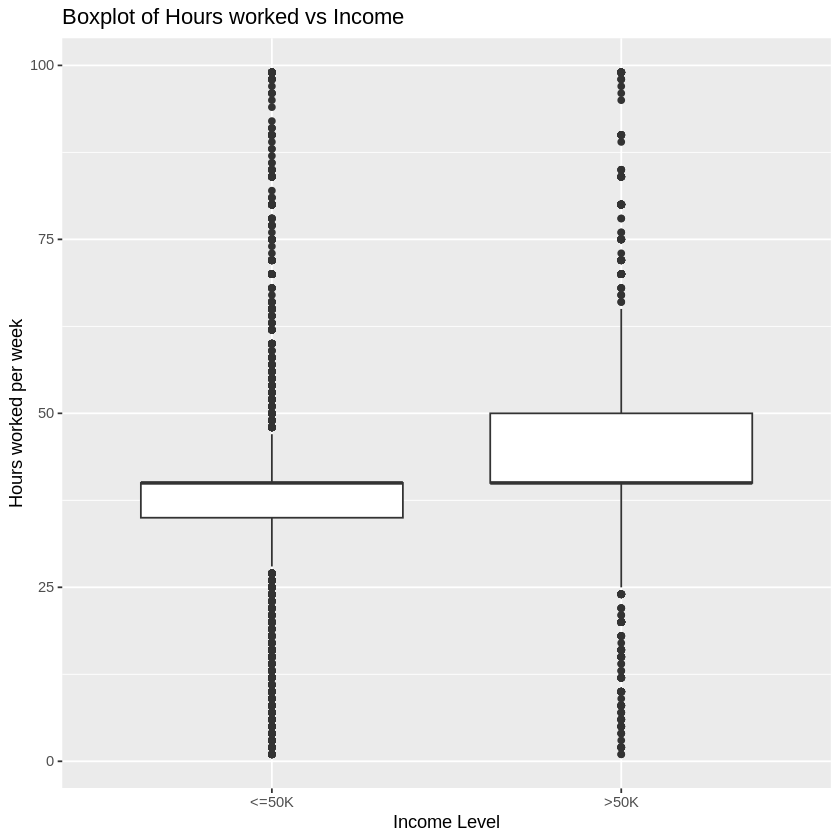

In [27]:
#Creating the boxplot based on work_data_clean 
work_boxplot <- work_data_clean |>
ggplot(aes(x=income, y = hours_per_week)) + 
geom_boxplot() + 
labs(x = "Income Level", y = "Hours worked per week", title = "Boxplot of Hours worked vs Income")

work_boxplot

Looking at our distribution, we can see that..... (WIP)

Now let's compute the estimates of our parameter based on our data. For our inference question, we will be calculating the mean and standard deviation of hours worked per week based on their respective income levels. We will name the table to hold the mean and standard deviation values `work_data_summary`.

In [34]:
work_data_summary <- work_data_clean |>
group_by(income) |>
summarize(mean = mean(hours_per_week),
        standard_deviation = sd(hours_per_week))

In [35]:
work_data_summary

income,mean,standard_deviation
<chr>,<dbl>,<dbl>
<=50K,38.84021,12.31899
>50K,45.47303,11.01297


Looking at the table above, we see that the estimate for our mean of hours worked per week for people with an income less than or equal to 50K is 38.84 hours and its standard deviation is 12.32 hours.  

The estimate for mean of hours worked per week for people with an income greater than 50K is 45.47 hours, and the standard deviation is 11.01 hours.

(Maybe want to add more?)

## Methods: Plan

We used INCOME LEVEL and HOURS WORKED PER WEEK, to examine relationship. We used over 100 data and clear plots to make our report trustworthy. To make us get larger number of data, we will use bootstrapping. Then, we will do hypothesis test and calculate confidence interval. For the hypothesis test, we will have that
$$H_0: \mu_{\text{<50k}} - \mu_{\text{>= 50k}} = 0$$ 
$$H_1: \mu_{\text{<50k}} - \mu_{\text{>= 50k}} < 0$$. 
For confidence interval, we obtain by using:
$$CI\left(\mu_1 - \mu_2\right) = \left(\bar{X}_1-\bar{X}_2\right) \pm z^*\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}$$
where $z^*$ is the quantile of a standard Normal.

We will get these by using bootstrapping and Central Limit Theorem and compare their results.

We have a boxplot and sample mean and standard deviation of HOURS WORKED PER WEEK for different INCOME LEVEL. This is not enough, because we haven’t calculated confidence interval, so we don’t know how much confidence for this hypothesis. Therefore, we still can’t answer our question.

For the influence, if our finding said that the hours worked per week for the people whose income is less than 50k is truly less than the people whose income is greater than or equal to 50k, then we can think that those people who earn less because they work less time than the people whose income is greater than or equal to 50k. 

For future, This result might encourage people to work harder in order to earn more money and have a higher quality life.  


## References

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Bick, Alexander, Nicola Fuchs-Schündeln, and David Lagakos. 2018. "How Do Hours Worked Vary with Income? Cross-Country Evidence and Implications." American Economic Review, 108 (1): 170-99.  DOI: 10.1257/aer.20151720

Alexiou, C, Kartiyasa, A. Does greater income inequality cause increased work hours? New evidence from high income economies. Bull Econ Res. 2020; 72: 380–392. https://doi.org/10.1111/boer.12226